**Clustering**<br>

**Problem Statement**<br>

Perform clustering for the airlines data to obtain optimum number of clusters. Draw the inferences from the clusters obtained. Refer to EastWestAirlines.xlsx dataset.

CRISP-ML(Q) process model describes six phases:<br>


Business and Data Understanding<br>
Data Preparation<br>
Model Building<br>
Model Evaluation<br>
Deployment<br>
Monitoring and Maintenance<br>



Objective(s): Maximize the Customers<br>

Constraints: Minimize the brain drain

In [ ]:
pip install feature_engine

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 290 kB 4.9 MB/s 


In [ ]:
pip install matplotlib==3.1.3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 13.1 MB 5.3 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2


In [ ]:
pip install dtale

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 14.0 MB 4.9 MB/s 
     |████████████████████████████████| 45 kB 2.8 MB/s 
     |████████████████████████████████| 62 kB 706 kB/s 
     |████████████████████████████████| 642 kB 38.9 MB/s 
     |████████████████████████████████| 9.9 MB 46.5 MB/s 
     |████████████████████████████████| 9.4 MB 56.7 MB/s 
     |████████████████████████████████| 79.9 MB 139 kB/s 
     |████████████████████████████████| 1.3 MB 44.4 MB/s 
     |████████████████████████████████| 220 kB 59.0 MB/s 
     |████████████████████████████████| 33.8 MB 440 kB/s 
     |████████████████████████████████| 295 kB 46.1 MB/s 
     |████████████████████████████████| 965 kB 57.8 MB/s 
     |████████████████████████████████| 357 kB 64.0 MB/s 
  Created wheel for dash-colorscales: filename=dash_colorscales-0.0.4-py3-none-any.whl size=62589 sha256=5a5f3e5a641f4a3c99e65a3bd21a3a846084fe80a8db99

In [ ]:
#importing required packages
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
from sklearn import preprocessing
from feature_engine.outliers import Winsorizer

In [ ]:
#import the data
df=pd.read_excel('/content/EastWestAirlines.xlsx')

In [ ]:
df

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID                 3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [ ]:
df.describe()

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [ ]:
'''
EXPLORATORY DATA ANALYSIS (EDA) / DESCRIPTIVE STATISTICS
1st Moment Business Decision (Measures of Central Tendency)

1) Mean

2) Median

3) Mode
''''

In [ ]:
print("Mean\n")
print(df.mean())
print("\nMedian\n")
print(df.median())
print("\nMode\n")
print(df.mode())

Mean

ID                    2014.819455
Balance              73601.327582
Qual_miles             144.114529
cc1_miles                2.059515
cc2_miles                1.014504
cc3_miles                1.012253
Bonus_miles          17144.846212
Bonus_trans             11.601900
Flight_miles_12mo      460.055764
Flight_trans_12          1.373593
Days_since_enroll     4118.559390
Award?                   0.370343
dtype: float64

Median

ID                    2016.0
Balance              43097.0
Qual_miles               0.0
cc1_miles                1.0
cc2_miles                1.0
cc3_miles                1.0
Bonus_miles           7171.0
Bonus_trans             12.0
Flight_miles_12mo        0.0
Flight_trans_12          0.0
Days_since_enroll     4096.0
Award?                   0.0
dtype: float64

Mode

        ID  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0        1   1000.0         0.0        1.0        1.0        1.0          0.0   
1        2      NaN         Na

In [ ]:
"""
2nd Moment Business Decision (Measures of Dispersion)

1) Variance

2) Standard deviation

3) Range (maximum - minimum)
"""

In [ ]:
print("\n Variance \n")
print(df.var())
print("\n Standard Deviation\n")
print(df.std())


 Variance 

ID                   1.347374e+06
Balance              1.015573e+10
Qual_miles           5.985557e+05
cc1_miles            1.895907e+00
cc2_miles            2.180060e-02
cc3_miles            3.811896e-02
Bonus_miles          5.832692e+08
Bonus_trans          9.223317e+01
Flight_miles_12mo    1.960586e+06
Flight_trans_12      1.438816e+01
Days_since_enroll    4.264781e+06
Award?               2.332473e-01
dtype: float64

 Standard Deviation

ID                     1160.764358
Balance              100775.664958
Qual_miles              773.663804
cc1_miles                 1.376919
cc2_miles                 0.147650
cc3_miles                 0.195241
Bonus_miles           24150.967826
Bonus_trans               9.603810
Flight_miles_12mo      1400.209171
Flight_trans_12           3.793172
Days_since_enroll      2065.134540
Award?                    0.482957
dtype: float64


In [ ]:
"""
3rd Business Moment Decision (Skewness)

Measure of asymmetry in the data distribution
"""

In [ ]:
print("Skewness\n")
df.skew()

Skewness



ID                   -0.003343
Balance               5.004187
Qual_miles            7.512395
cc1_miles             0.857569
cc2_miles            11.210459
cc3_miles            17.195532
Bonus_miles           2.842093
Bonus_trans           1.157362
Flight_miles_12mo     7.451666
Flight_trans_12       5.490461
Days_since_enroll     0.120174
Award?                0.537200
dtype: float64

In [ ]:
"""
4th Business Moment Decision (Kurtosis)

Measure of peakedness - represents the overall spread in the data
"""

In [ ]:
print("Kurtosis\n")
df.kurt()

Kurtosis



ID                    -1.199648
Balance               44.157932
Qual_miles            67.689351
cc1_miles             -0.748508
cc2_miles            133.786489
cc3_miles            308.654728
Bonus_miles           13.630489
Bonus_trans            2.745737
Flight_miles_12mo     94.761019
Flight_trans_12       42.978152
Days_since_enroll     -0.967505
Award?                -1.712272
dtype: float64

In [ ]:
"""
Cleaning Unwanted columns
ID column is not needed for analysis purpose.
"""

In [ ]:
df.drop(['ID'], axis = 1, inplace = True)

In [ ]:
df.info()

In [ ]:
"""
Handling duplicates:


"""

In [ ]:
duplicate=df.duplicated()
sum(duplicate)

In [ ]:
#Removing duplicated row
df=df.drop_duplicates()

In [ ]:
"""
Missing Value Analysis
"""

In [ ]:
df.isnull().sum()

In [ ]:
"""
From above observation there is no null value in dataset
"""

In [ ]:
"""
Outliers Analysis
"""

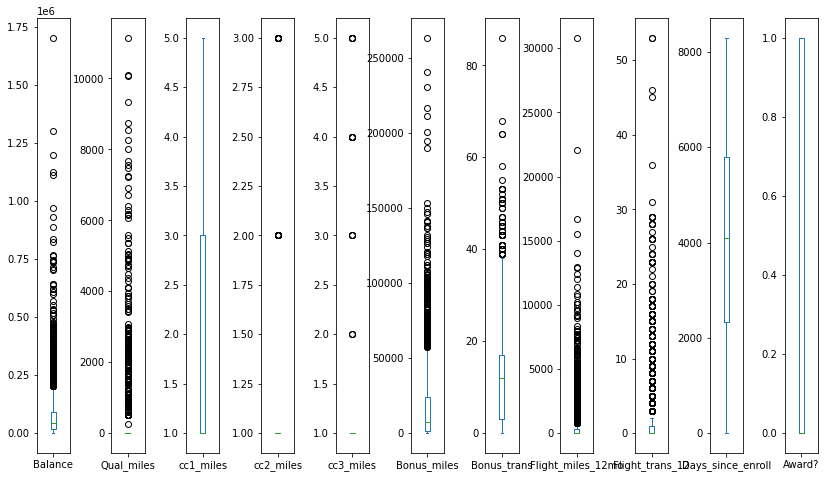

In [ ]:
df.plot(kind = 'box', subplots = True, sharey = False, figsize = (14, 8)) 
plt.subplots_adjust(wspace = 1.25) 
plt.show()  

In [ ]:
#Outlier treatment
winsor = Winsorizer(capping_method='iqr', # choose  IQR rule boundaries or gaussian for mean and std
                          tail='both', # cap left, right or both tails 
                          fold=1.5,
                          variables=['Balance','Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12'])

df = winsor.fit_transform(df[['Balance','Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12']])

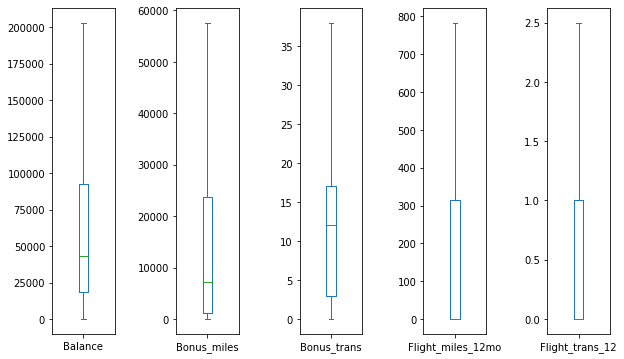

In [ ]:
#Verify for outliers post the treatment
df.plot(kind = 'box', subplots = True, sharey = False, figsize = (10, 6)) 
plt.subplots_adjust(wspace = 0.97) 
plt.show() 

In [ ]:
#Zero and near zero variance
df.var()

Balance              3.442337e+09
Bonus_miles          3.268697e+08
Bonus_trans          8.307298e+01
Flight_miles_12mo    8.792031e+04
Flight_trans_12      8.928328e-01
dtype: float64

In [ ]:
#Graphical representation

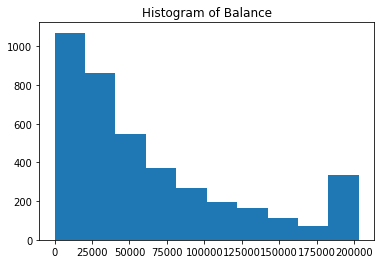

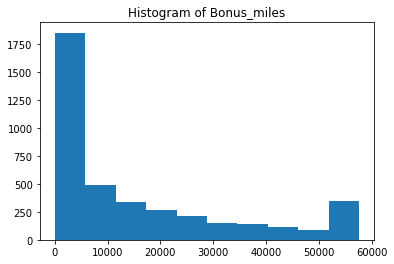

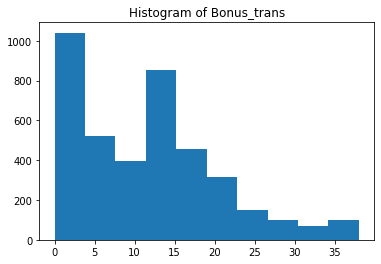

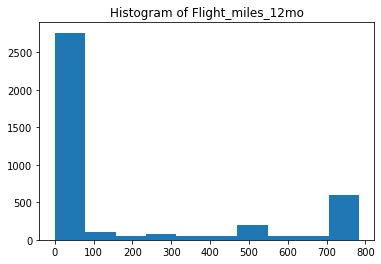

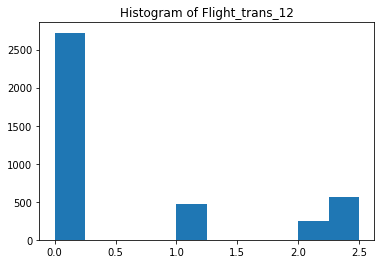

In [ ]:
# Histogram describes the spread of data

for i in df.columns:
  plt.hist(x = df[i])
  plt.title("Histogram of " + str(i))
  plt.show()

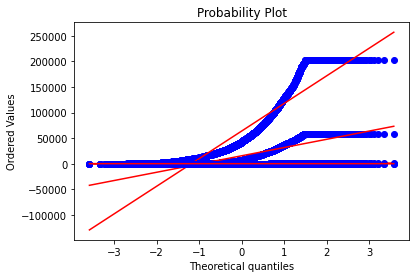

In [ ]:
# Normal Quantile-Quantile Plot - Helps in understanding the distribution of the data - Normal distribution or not
import scipy.stats as stats
import pylab

# Checking Whether data is normally distributed
for i in df.columns:
  stats.probplot(df[i], dist = "norm", plot = pylab)

In [ ]:
#Bivariate Analysis
#Scatter Plot

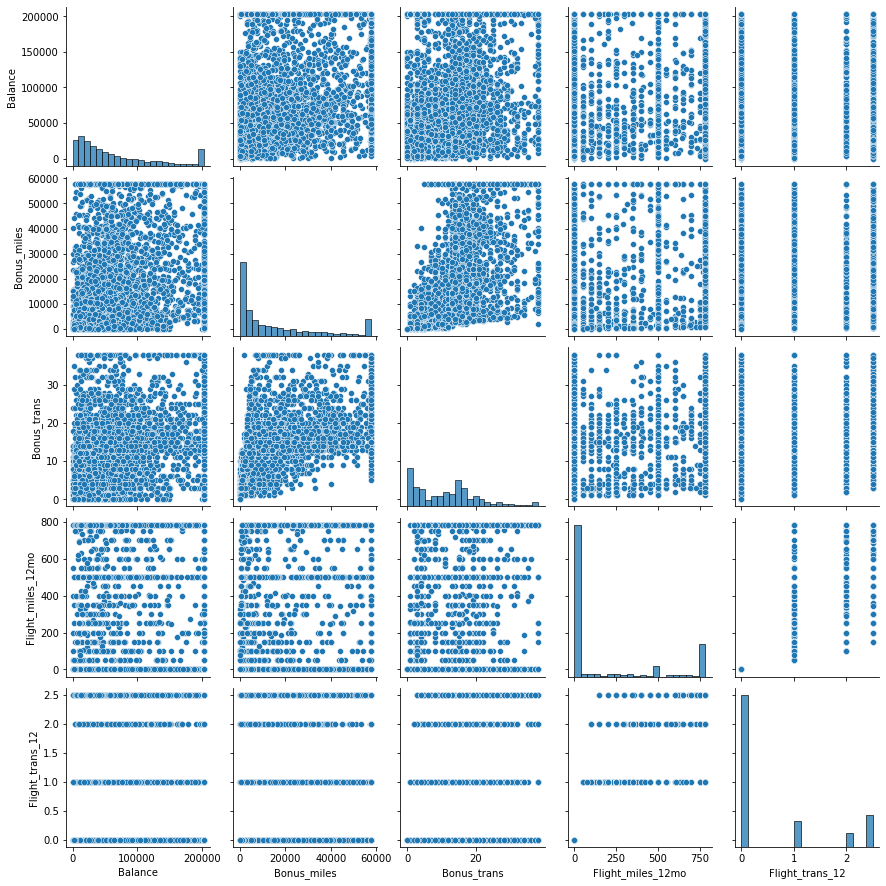

In [ ]:
sns.pairplot(df)   # Use numerical variables for scatter plots

In [ ]:
#Scaling using Normalization:

In [ ]:
def norm_func(i):
  x = (i-i.min()) / (i.max()-i.min())
  return(x)

In [ ]:
df = norm_func(df)

In [ ]:
df.describe()

,Balance,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12
count,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000
mean,0.313880,0.267405,0.301934,0.228376,0.236668
std,0.288722,0.313598,0.239854,0.378327,0.377959
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.091207,0.021682,0.078947,0.000000,0.000000
50%,0.212282,0.124593,0.315789,0.000000,0.000000
75%,0.454724,0.413009,0.447368,0.400000,0.400000
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
'''
CLUSTERING MODEL BUILDING
Hierarchical Clustering - Agglomerative Clustering
'''

In [ ]:
# Libraries for creating dendrogram 
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering 


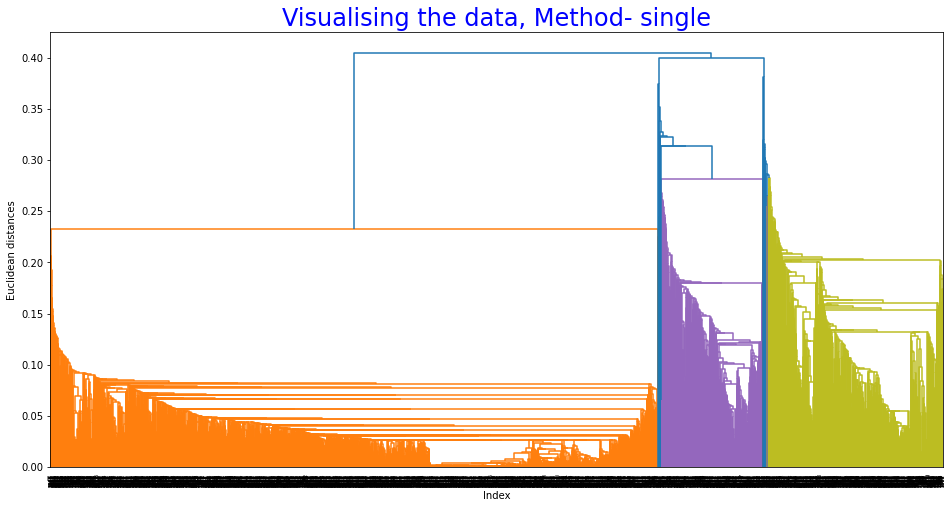

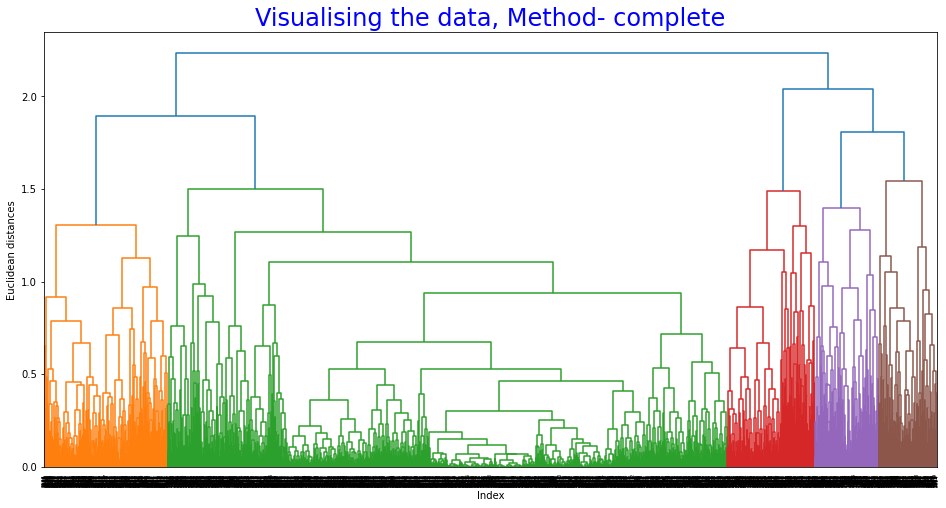

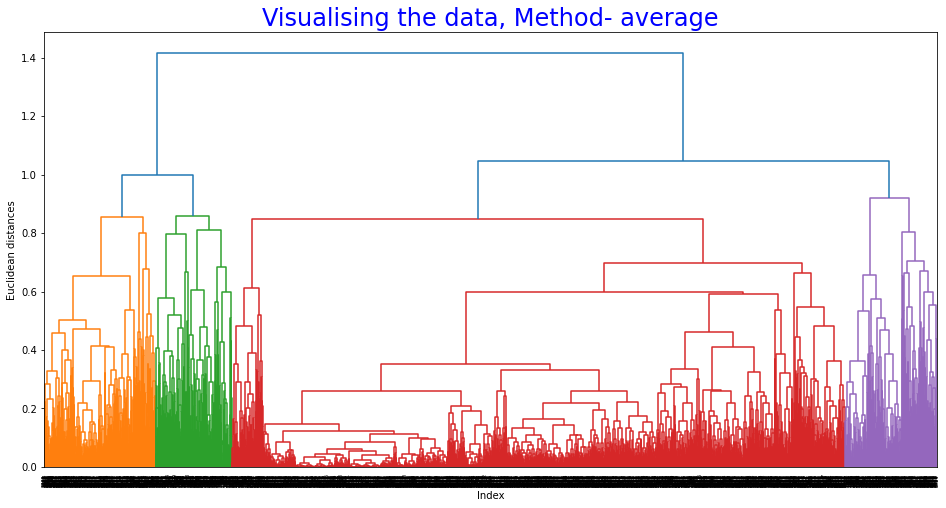

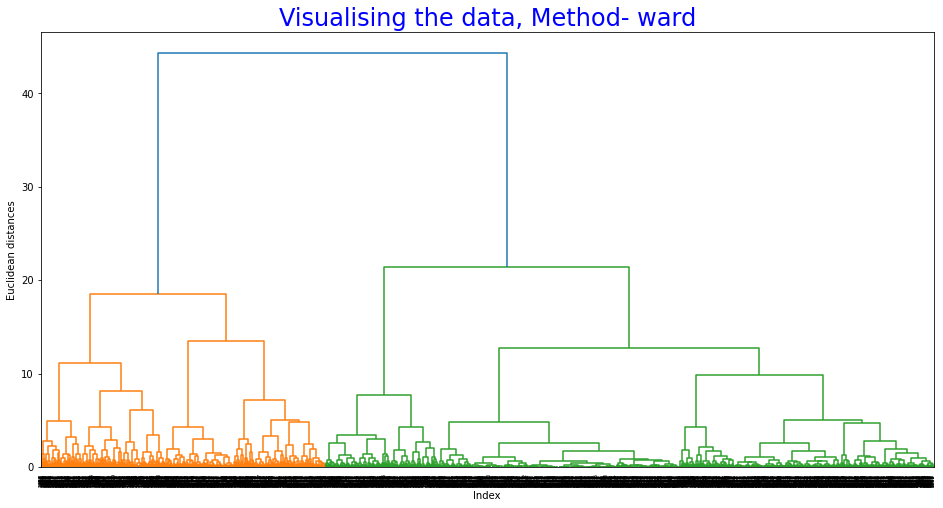

In [ ]:
for methods in ['single','complete','average','ward']: 
  plt.figure(figsize =(16, 8)) 
  dict = {'fontsize':24,'fontweight' :16, 'color' : 'blue'}
  plt.title('Visualising the data, Method- {}'.format(methods),fontdict = dict) 
  tree_plot=dendrogram(linkage(df, method =methods,optimal_ordering=False))
  plt.xlabel('Index')
  plt.ylabel('Euclidean distances')
  plt.show()

In [ ]:
"""
# Applying AgglomerativeClustering choosing 6 as clusters from the above dendrogram
# Choosed cluster from ward method

def add_element(labels, key, value):
    if key not in labels:
        labels[key] = []
    labels[key].append(value)

labels = {}
for linkages in ["complete", "average", "single"]:
  hc = AgglomerativeClustering(n_clusters = 6, affinity = 'euclidean', linkage =linkages)
  hie_labels = hc.fit_predict(df)
  add_element(labels, linkages, hie_labels)
print(labels)
"""
#labels.items()

{'complete': [array([0, 0, 0, ..., 0, 3, 0])], 'average': [array([2, 2, 2, ..., 2, 2, 2])], 'single': [array([3, 3, 3, ..., 3, 0, 3])]}


In [ ]:
from sklearn.metrics import silhouette_score

n_clusters = [2,3,4,5,6,7,8]  # always start number from 2.

for n_clusters in n_clusters:
    for linkages in ["ward", "complete", "average", "single"]:
        hie_cluster1 = AgglomerativeClustering(n_clusters=n_clusters,linkage=linkages) # bydefault it takes linkage 'ward'
        hie_labels1 = hie_cluster1.fit_predict(df)
        silhouette_score1 = silhouette_score(df, hie_labels1)
        print("For n_clusters =", n_clusters,"The average silhouette_score with linkage-",linkages, ':',silhouette_score1)
    print()

For n_clusters = 2 The average silhouette_score with linkage- ward : 0.47976964031214026
For n_clusters = 2 The average silhouette_score with linkage- complete : 0.40703853520604294
For n_clusters = 2 The average silhouette_score with linkage- average : 0.5180950682887635
For n_clusters = 2 The average silhouette_score with linkage- single : 0.47976964031214026

For n_clusters = 3 The average silhouette_score with linkage- ward : 0.3951271157024963
For n_clusters = 3 The average silhouette_score with linkage- complete : 0.3252022909856575
For n_clusters = 3 The average silhouette_score with linkage- average : 0.44218168459323276
For n_clusters = 3 The average silhouette_score with linkage- single : 0.35494231592109915

For n_clusters = 4 The average silhouette_score with linkage- ward : 0.38877392986057374
For n_clusters = 4 The average silhouette_score with linkage- complete : 0.3912765788239672
For n_clusters = 4 The average silhouette_score with linkage- average : 0.4253813683664414

In [ ]:

hc1 = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'complete')

y_hc1 = hc1.fit_predict(df)
y_hc1

array([1, 1, 1, ..., 1, 1, 1])

In [ ]:

hc2 = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'average')

y_hc2 = hc2.fit_predict(df)
y_hc2

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:

hc3 = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'single')

y_hc3 = hc2.fit_predict(df)
y_hc3

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
hc2.labels_ 

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
cluster_labels = pd.Series(hc2.labels_)

In [ ]:
# Add Cluster labels to orignal Dataset

df['cluster'] = cluster_labels
df.head(20)

,Balance,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,cluster
0,0.138491,0.003018,0.026316,0.000000,0.0,0.0
1,0.094700,0.003729,0.052632,0.000000,0.0,0.0
2,0.203503,0.071515,0.105263,0.000000,0.0,0.0
3,0.072713,0.008673,0.026316,0.000000,0.0,0.0
4,0.481037,0.751060,0.684211,1.000000,1.0,1.0
5,0.080803,0.000000,0.000000,0.000000,0.0,0.0
6,0.417861,0.476689,0.657895,0.000000,0.0,0.0
7,0.102632,0.091064,0.105263,0.318979,0.4,0.0
8,1.000000,0.030407,1.000000,1.000000,1.0,1.0
9,0.516015,0.493063,0.736842,1.000000,1.0,1.0


In [ ]:
df2 = df.sort_values(by = 'cluster', ascending = True)
df2

,Balance,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,cluster
0,0.138491,0.003018,0.026316,0.0,0.0,0.0
2531,1.000000,0.837562,0.473684,0.0,0.0,0.0
2532,0.126327,0.182353,0.315789,0.0,0.0,0.0
2533,0.942778,0.445345,0.473684,0.0,0.0,0.0
2534,0.444523,0.222803,0.657895,0.0,0.0,0.0
...,...,...,...,...,...,...
1442,0.329391,0.059842,0.131579,1.0,1.0,1.0
3235,1.000000,0.453775,1.000000,1.0,1.0,1.0
1417,0.170188,0.120759,0.552632,1.0,1.0,1.0
1794,0.086654,0.013928,0.131579,1.0,1.0,1.0


In [ ]:
cluster0 = df2.loc[(df2.cluster == 0), :]
cluster0

,Balance,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,cluster
0,0.138491,0.003018,0.026316,0.000000,0.0,0.0
2531,1.000000,0.837562,0.473684,0.000000,0.0,0.0
2532,0.126327,0.182353,0.315789,0.000000,0.0,0.0
2533,0.942778,0.445345,0.473684,0.000000,0.0,0.0
2534,0.444523,0.222803,0.657895,0.000000,0.0,0.0
...,...,...,...,...,...,...
1515,0.118143,0.009367,0.078947,0.000000,0.0,0.0
1516,0.582719,0.077621,0.263158,0.127592,0.4,0.0
1744,0.536949,0.554292,0.710526,0.000000,0.0,0.0
1517,0.013744,0.138764,0.078947,0.000000,0.0,0.0


In [ ]:
cluster1 = df2.loc[(df2.cluster == 1), :]
cluster1

,Balance,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,cluster
318,1.000000,0.197704,0.078947,0.507815,0.4,1.0
375,0.001137,0.518630,0.631579,1.000000,1.0,1.0
3543,0.143604,0.061004,0.473684,0.819139,0.8,1.0
2009,0.879543,0.459048,0.578947,1.000000,1.0,1.0
2113,0.714690,0.162458,0.131579,1.000000,1.0,1.0
...,...,...,...,...,...,...
1440,0.285058,0.026018,0.078947,1.000000,1.0,1.0
1442,0.329391,0.059842,0.131579,1.000000,1.0,1.0
3235,1.000000,0.453775,1.000000,1.000000,1.0,1.0
1417,0.170188,0.120759,0.552632,1.000000,1.0,1.0


In [ ]:
cluster1.to_csv('East_west_0.csv', encoding = 'utf-8')
import os
os.getcwd()

'/content'